In [ ]:
#!pip install spotipy

In [1]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import pandas as pd

In [2]:
secrets_file = open("secrets.txt","r")

In [3]:
string = secrets_file.read()

In [4]:
secrets_dict={}
for line in string.split('\n'):
    if len(line) > 0:
        secrets_dict[line.split(':')[0]]=line.split(':')[1]

In [5]:
#Initialize SpotiPy with user credentials
sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id=secrets_dict['cid'],
                                                           client_secret=secrets_dict['csecret']))

# Using the lesson playlist 

In [6]:
playlist = sp.user_playlist_tracks("spotify","4rnleEAOdmFAbRcNCgZMpY")

In [7]:
# To check the keys of the playlist

playlist.keys()

dict_keys(['href', 'items', 'limit', 'next', 'offset', 'previous', 'total'])

In [8]:
playlist["total"] 

5295

In [9]:
len(playlist["items"])

100

In [10]:
playlist['next']

'https://api.spotify.com/v1/playlists/4rnleEAOdmFAbRcNCgZMpY/tracks?offset=100&limit=100&additional_types=track'

In [11]:
sp.next(playlist)

{'href': 'https://api.spotify.com/v1/playlists/4rnleEAOdmFAbRcNCgZMpY/tracks?offset=100&limit=100&additional_types=track',
 'items': [{'added_at': '2016-07-05T18:39:33Z',
   'added_by': {'external_urls': {'spotify': 'https://open.spotify.com/user/1130225252'},
    'href': 'https://api.spotify.com/v1/users/1130225252',
    'id': '1130225252',
    'type': 'user',
    'uri': 'spotify:user:1130225252'},
   'is_local': False,
   'primary_color': None,
   'track': {'album': {'album_type': 'album',
     'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/5lKZWd6HiSCLfnDGrq9RAm'},
       'href': 'https://api.spotify.com/v1/artists/5lKZWd6HiSCLfnDGrq9RAm',
       'id': '5lKZWd6HiSCLfnDGrq9RAm',
       'name': 'Leona Lewis',
       'type': 'artist',
       'uri': 'spotify:artist:5lKZWd6HiSCLfnDGrq9RAm'}],
     'available_markets': ['AD',
      'AE',
      'AG',
      'AL',
      'AM',
      'AO',
      'AR',
      'AT',
      'AU',
      'AZ',
      'BA',
      'BB',
     

In [12]:
playlist['href']

'https://api.spotify.com/v1/playlists/4rnleEAOdmFAbRcNCgZMpY/tracks?offset=0&limit=100&additional_types=track'

In [13]:
from random import randint
from time import sleep

def get_playlist_tracks(playlist_id):
    results = sp.user_playlist_tracks("spotify",playlist_id)
    tracks = results['items']
    while results['next']!=None:
        results = sp.next(results)
        tracks = tracks + results['items']
        sleep(randint(1,3))
    return tracks

In [14]:
all_tracks = get_playlist_tracks("4rnleEAOdmFAbRcNCgZMpY")
len(all_tracks)

5295

# Exploring the tracks 

In [15]:
# Check items

playlist['items'][0].keys()

dict_keys(['added_at', 'added_by', 'is_local', 'primary_color', 'track', 'video_thumbnail'])

In [16]:
playlist['items'][0]['track']

{'album': {'album_type': 'album',
  'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/2FXC3k01G6Gw61bmprjgqS'},
    'href': 'https://api.spotify.com/v1/artists/2FXC3k01G6Gw61bmprjgqS',
    'id': '2FXC3k01G6Gw61bmprjgqS',
    'name': 'Hozier',
    'type': 'artist',
    'uri': 'spotify:artist:2FXC3k01G6Gw61bmprjgqS'}],
  'available_markets': [],
  'external_urls': {'spotify': 'https://open.spotify.com/album/7HW03Zew4rnOhy5uwskRSz'},
  'href': 'https://api.spotify.com/v1/albums/7HW03Zew4rnOhy5uwskRSz',
  'id': '7HW03Zew4rnOhy5uwskRSz',
  'images': [{'height': 640,
    'url': 'https://i.scdn.co/image/ab67616d0000b2736a452516b66b53f65a3e4b33',
    'width': 640},
   {'height': 300,
    'url': 'https://i.scdn.co/image/ab67616d00001e026a452516b66b53f65a3e4b33',
    'width': 300},
   {'height': 64,
    'url': 'https://i.scdn.co/image/ab67616d000048516a452516b66b53f65a3e4b33',
    'width': 64}],
  'name': 'Hozier (Deluxe)',
  'release_date': '2014-05-20',
  'release_date

In [17]:
# Explore the first song 
# To extract the artist name 
# use track, enter album, and from album--> artists where we can extract the artist name

playlist["items"][0]["track"]["album"]['artists'][0]['name']

'Hozier'

In [18]:
# To extract the song name

playlist['items'][0]['track']['name']

'Take Me To Church'

In [19]:
# To extract the track uri

playlist['items'][0]['track']['uri']

'spotify:track:7dS5EaCoMnN7DzlpT6aRn2'

# create a dataframe for the playlist 

In [20]:
song_name = []
artist_name = []
track_uri = []

for i in range(len(all_tracks)):
    try:
        song = all_tracks[i]['track']['name']
        artist = all_tracks[i]['track']['album']['artists'][0]['name']
        uri = all_tracks[i]['track']['uri']
        artist_name.append(artist)
        song_name.append(song)
        track_uri.append(uri)
    except:
        artist_name.append('NA')
        song_name.append('NA')
        track_uri.append('NA')

playlist_df= pd.DataFrame({'song': song_name,'artist': artist_name,'uri': track_uri})


In [21]:
playlist_df.head()

,song,artist,uri
0,Take Me To Church,Hozier,spotify:track:7dS5EaCoMnN7DzlpT6aRn2
1,Cooler Than Me - Single Mix,Mike Posner,spotify:track:2V4bv1fNWfTcyRJKmej6Sj
2,See You Again (feat. Kali Uchis),"Tyler, The Creator",spotify:track:7KA4W4McWYRpgf0fWsJZWB
3,Pompeii,Bastille,spotify:track:3gbBpTdY8lnQwqxNCcf795
4,Hips Don't Lie (feat. Wyclef Jean),Shakira,spotify:track:3ZFTkvIE7kyPt6Nu3PEa7V


In [22]:
playlist_df.shape

(5295, 3)

# Extract audio features

In [ ]:
# using the uri of each song to get the audio features

#def audio_features(uri):
    
#    return sp.audio_features(uri)

In [ ]:
#playlist_df['uri']= playlist_df['uri'].apply(audio_features)

In [ ]:
#import time
#import random
#from random import randint
#from time import sleep

In [ ]:
#list_audio_features = []
#stop_list = list(range(1,10000,100))

#for i in range(len(playlist_df['uri'])):
#    if i in stop_list:
#        wait_time = random.randint(1,4)
#        print('Napping for ',wait_time,'s')
#        print(i)
#        sleep(wait_time)      
#    list_audio_features.append(sp.audio_features(playlist_df['uri'][i]))

In [23]:
list_audio_features = []

for i in range(len(playlist_df['uri'])):
    try:
        list_audio_features.append(sp.audio_features(playlist_df['uri'][i]))
    except:
        list_audio_features.append('NA')
                                   
features = pd.DataFrame(list_audio_features)                                   

In [24]:
features

,0
0,"{'danceability': 0.566, 'energy': 0.664, 'key'..."
1,"{'danceability': 0.768, 'energy': 0.82, 'key':..."
2,"{'danceability': 0.558, 'energy': 0.559, 'key'..."
3,"{'danceability': 0.679, 'energy': 0.715, 'key'..."
4,"{'danceability': 0.778, 'energy': 0.824, 'key'..."
...,...
5290,"{'danceability': 0.609, 'energy': 0.679, 'key'..."
5291,"{'danceability': 0.439, 'energy': 0.61, 'key':..."
5292,"{'danceability': 0.897, 'energy': 0.371, 'key'..."
5293,"{'danceability': 0.964, 'energy': 0.398, 'key'..."


In [25]:
# The original dataframe 

playlist_df.head()

,song,artist,uri
0,Take Me To Church,Hozier,spotify:track:7dS5EaCoMnN7DzlpT6aRn2
1,Cooler Than Me - Single Mix,Mike Posner,spotify:track:2V4bv1fNWfTcyRJKmej6Sj
2,See You Again (feat. Kali Uchis),"Tyler, The Creator",spotify:track:7KA4W4McWYRpgf0fWsJZWB
3,Pompeii,Bastille,spotify:track:3gbBpTdY8lnQwqxNCcf795
4,Hips Don't Lie (feat. Wyclef Jean),Shakira,spotify:track:3ZFTkvIE7kyPt6Nu3PEa7V


# Flattening the column in features 

In [26]:
features

,0
0,"{'danceability': 0.566, 'energy': 0.664, 'key'..."
1,"{'danceability': 0.768, 'energy': 0.82, 'key':..."
2,"{'danceability': 0.558, 'energy': 0.559, 'key'..."
3,"{'danceability': 0.679, 'energy': 0.715, 'key'..."
4,"{'danceability': 0.778, 'energy': 0.824, 'key'..."
...,...
5290,"{'danceability': 0.609, 'energy': 0.679, 'key'..."
5291,"{'danceability': 0.439, 'energy': 0.61, 'key':..."
5292,"{'danceability': 0.897, 'energy': 0.371, 'key'..."
5293,"{'danceability': 0.964, 'energy': 0.398, 'key'..."


In [ ]:
#features= features.drop([1], axis=1)
#features

In [27]:
features.columns = ['audio_features']

In [28]:
features

,audio_features
0,"{'danceability': 0.566, 'energy': 0.664, 'key'..."
1,"{'danceability': 0.768, 'energy': 0.82, 'key':..."
2,"{'danceability': 0.558, 'energy': 0.559, 'key'..."
3,"{'danceability': 0.679, 'energy': 0.715, 'key'..."
4,"{'danceability': 0.778, 'energy': 0.824, 'key'..."
...,...
5290,"{'danceability': 0.609, 'energy': 0.679, 'key'..."
5291,"{'danceability': 0.439, 'energy': 0.61, 'key':..."
5292,"{'danceability': 0.897, 'energy': 0.371, 'key'..."
5293,"{'danceability': 0.964, 'energy': 0.398, 'key'..."


In [29]:
def flatten(df, col_list):
    for column in col_list:
        flattened = pd.DataFrame(dict(df[column])).transpose()
        columns = [str(col) for col in flattened.columns]
        flattened.columns = [colname for colname in columns]
        Myplaylist = pd.concat([df, flattened], axis=1)
        Myplaylist = Myplaylist.drop(column, axis=1)
    return Myplaylist

In [30]:
flat = flatten(features, ['audio_features'])
flat

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.566,0.664,4,-5.303,0,0.0464,0.634,0,0.116,0.437,128.945,audio_features,7dS5EaCoMnN7DzlpT6aRn2,spotify:track:7dS5EaCoMnN7DzlpT6aRn2,https://api.spotify.com/v1/tracks/7dS5EaCoMnN7...,https://api.spotify.com/v1/audio-analysis/7dS5...,241688,4
1,0.768,0.82,7,-4.63,0,0.0474,0.179,0,0.689,0.625,129.965,audio_features,2V4bv1fNWfTcyRJKmej6Sj,spotify:track:2V4bv1fNWfTcyRJKmej6Sj,https://api.spotify.com/v1/tracks/2V4bv1fNWfTc...,https://api.spotify.com/v1/audio-analysis/2V4b...,213293,4
2,0.558,0.559,6,-9.222,1,0.0959,0.371,0.000007,0.109,0.62,78.558,audio_features,7KA4W4McWYRpgf0fWsJZWB,spotify:track:7KA4W4McWYRpgf0fWsJZWB,https://api.spotify.com/v1/tracks/7KA4W4McWYRp...,https://api.spotify.com/v1/audio-analysis/7KA4...,180387,4
3,0.679,0.715,9,-6.383,1,0.0407,0.0755,0,0.271,0.571,127.435,audio_features,3gbBpTdY8lnQwqxNCcf795,spotify:track:3gbBpTdY8lnQwqxNCcf795,https://api.spotify.com/v1/tracks/3gbBpTdY8lnQ...,https://api.spotify.com/v1/audio-analysis/3gbB...,214148,4
4,0.778,0.824,10,-5.892,0,0.0707,0.284,0,0.405,0.758,100.024,audio_features,3ZFTkvIE7kyPt6Nu3PEa7V,spotify:track:3ZFTkvIE7kyPt6Nu3PEa7V,https://api.spotify.com/v1/tracks/3ZFTkvIE7kyP...,https://api.spotify.com/v1/audio-analysis/3ZFT...,218093,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5290,0.609,0.679,0,-4.545,1,0.0312,0.243,0,0.199,0.487,122.034,audio_features,4Zcz6saEkOII3PlXd9gN3o,spotify:track:4Zcz6saEkOII3PlXd9gN3o,https://api.spotify.com/v1/tracks/4Zcz6saEkOII...,https://api.spotify.com/v1/audio-analysis/4Zcz...,215960,4
5291,0.439,0.61,9,-7.236,1,0.116,0.593,0.000011,0.341,0.172,181.088,audio_features,61KpQadow081I2AsbeLcsb,spotify:track:61KpQadow081I2AsbeLcsb,https://api.spotify.com/v1/tracks/61KpQadow081...,https://api.spotify.com/v1/audio-analysis/61Kp...,215508,4
5292,0.897,0.371,1,-5.019,1,0.368,0.0904,0,0.325,0.441,81.008,audio_features,5yorXJWdBan1Vlh116ZtQ7,spotify:track:5yorXJWdBan1Vlh116ZtQ7,https://api.spotify.com/v1/tracks/5yorXJWdBan1...,https://api.spotify.com/v1/audio-analysis/5yor...,156005,4
5293,0.964,0.398,11,-8.981,0,0.0795,0.00151,0.000039,0.101,0.563,105.012,audio_features,11ZulcYY4lowvcQm4oe3VJ,spotify:track:11ZulcYY4lowvcQm4oe3VJ,https://api.spotify.com/v1/tracks/11ZulcYY4low...,https://api.spotify.com/v1/audio-analysis/11Zu...,178405,4


# Concatenate the two dataframes

In [31]:
playlist_merged = pd.concat([playlist_df, flat], axis=1)

In [32]:
playlist_merged

,song,artist,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,...,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,Take Me To Church,Hozier,spotify:track:7dS5EaCoMnN7DzlpT6aRn2,0.566,0.664,4,-5.303,0,0.0464,0.634,...,0.116,0.437,128.945,audio_features,7dS5EaCoMnN7DzlpT6aRn2,spotify:track:7dS5EaCoMnN7DzlpT6aRn2,https://api.spotify.com/v1/tracks/7dS5EaCoMnN7...,https://api.spotify.com/v1/audio-analysis/7dS5...,241688,4
1,Cooler Than Me - Single Mix,Mike Posner,spotify:track:2V4bv1fNWfTcyRJKmej6Sj,0.768,0.82,7,-4.63,0,0.0474,0.179,...,0.689,0.625,129.965,audio_features,2V4bv1fNWfTcyRJKmej6Sj,spotify:track:2V4bv1fNWfTcyRJKmej6Sj,https://api.spotify.com/v1/tracks/2V4bv1fNWfTc...,https://api.spotify.com/v1/audio-analysis/2V4b...,213293,4
2,See You Again (feat. Kali Uchis),"Tyler, The Creator",spotify:track:7KA4W4McWYRpgf0fWsJZWB,0.558,0.559,6,-9.222,1,0.0959,0.371,...,0.109,0.62,78.558,audio_features,7KA4W4McWYRpgf0fWsJZWB,spotify:track:7KA4W4McWYRpgf0fWsJZWB,https://api.spotify.com/v1/tracks/7KA4W4McWYRp...,https://api.spotify.com/v1/audio-analysis/7KA4...,180387,4
3,Pompeii,Bastille,spotify:track:3gbBpTdY8lnQwqxNCcf795,0.679,0.715,9,-6.383,1,0.0407,0.0755,...,0.271,0.571,127.435,audio_features,3gbBpTdY8lnQwqxNCcf795,spotify:track:3gbBpTdY8lnQwqxNCcf795,https://api.spotify.com/v1/tracks/3gbBpTdY8lnQ...,https://api.spotify.com/v1/audio-analysis/3gbB...,214148,4
4,Hips Don't Lie (feat. Wyclef Jean),Shakira,spotify:track:3ZFTkvIE7kyPt6Nu3PEa7V,0.778,0.824,10,-5.892,0,0.0707,0.284,...,0.405,0.758,100.024,audio_features,3ZFTkvIE7kyPt6Nu3PEa7V,spotify:track:3ZFTkvIE7kyPt6Nu3PEa7V,https://api.spotify.com/v1/tracks/3ZFTkvIE7kyP...,https://api.spotify.com/v1/audio-analysis/3ZFT...,218093,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5290,Hermit the Frog,MARINA,spotify:track:4Zcz6saEkOII3PlXd9gN3o,0.609,0.679,0,-4.545,1,0.0312,0.243,...,0.199,0.487,122.034,audio_features,4Zcz6saEkOII3PlXd9gN3o,spotify:track:4Zcz6saEkOII3PlXd9gN3o,https://api.spotify.com/v1/tracks/4Zcz6saEkOII...,https://api.spotify.com/v1/audio-analysis/4Zcz...,215960,4
5291,deja vu,Olivia Rodrigo,spotify:track:61KpQadow081I2AsbeLcsb,0.439,0.61,9,-7.236,1,0.116,0.593,...,0.341,0.172,181.088,audio_features,61KpQadow081I2AsbeLcsb,spotify:track:61KpQadow081I2AsbeLcsb,https://api.spotify.com/v1/tracks/61KpQadow081...,https://api.spotify.com/v1/audio-analysis/61Kp...,215508,4
5292,WHOLE LOTTA MONEY,BIA,spotify:track:5yorXJWdBan1Vlh116ZtQ7,0.897,0.371,1,-5.019,1,0.368,0.0904,...,0.325,0.441,81.008,audio_features,5yorXJWdBan1Vlh116ZtQ7,spotify:track:5yorXJWdBan1Vlh116ZtQ7,https://api.spotify.com/v1/tracks/5yorXJWdBan1...,https://api.spotify.com/v1/audio-analysis/5yor...,156005,4
5293,Slumber Party (feat. Princess Nokia),Ashnikko,spotify:track:11ZulcYY4lowvcQm4oe3VJ,0.964,0.398,11,-8.981,0,0.0795,0.00151,...,0.101,0.563,105.012,audio_features,11ZulcYY4lowvcQm4oe3VJ,spotify:track:11ZulcYY4lowvcQm4oe3VJ,https://api.spotify.com/v1/tracks/11ZulcYY4low...,https://api.spotify.com/v1/audio-analysis/11Zu...,178405,4


# Save the dataframe to csv

In [33]:
playlist_merged.to_csv('playlist_merged.csv', index=False)

In [34]:
playlist_merged= pd.read_csv('playlist_merged.csv')

In [35]:
playlist_merged

,song,artist,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,...,liveness,valence,tempo,type,id,uri.1,track_href,analysis_url,duration_ms,time_signature
0,Take Me To Church,Hozier,spotify:track:7dS5EaCoMnN7DzlpT6aRn2,0.566,0.664,4,-5.303,0,0.0464,0.63400,...,0.116,0.437,128.945,audio_features,7dS5EaCoMnN7DzlpT6aRn2,spotify:track:7dS5EaCoMnN7DzlpT6aRn2,https://api.spotify.com/v1/tracks/7dS5EaCoMnN7...,https://api.spotify.com/v1/audio-analysis/7dS5...,241688,4
1,Cooler Than Me - Single Mix,Mike Posner,spotify:track:2V4bv1fNWfTcyRJKmej6Sj,0.768,0.820,7,-4.630,0,0.0474,0.17900,...,0.689,0.625,129.965,audio_features,2V4bv1fNWfTcyRJKmej6Sj,spotify:track:2V4bv1fNWfTcyRJKmej6Sj,https://api.spotify.com/v1/tracks/2V4bv1fNWfTc...,https://api.spotify.com/v1/audio-analysis/2V4b...,213293,4
2,See You Again (feat. Kali Uchis),"Tyler, The Creator",spotify:track:7KA4W4McWYRpgf0fWsJZWB,0.558,0.559,6,-9.222,1,0.0959,0.37100,...,0.109,0.620,78.558,audio_features,7KA4W4McWYRpgf0fWsJZWB,spotify:track:7KA4W4McWYRpgf0fWsJZWB,https://api.spotify.com/v1/tracks/7KA4W4McWYRp...,https://api.spotify.com/v1/audio-analysis/7KA4...,180387,4
3,Pompeii,Bastille,spotify:track:3gbBpTdY8lnQwqxNCcf795,0.679,0.715,9,-6.383,1,0.0407,0.07550,...,0.271,0.571,127.435,audio_features,3gbBpTdY8lnQwqxNCcf795,spotify:track:3gbBpTdY8lnQwqxNCcf795,https://api.spotify.com/v1/tracks/3gbBpTdY8lnQ...,https://api.spotify.com/v1/audio-analysis/3gbB...,214148,4
4,Hips Don't Lie (feat. Wyclef Jean),Shakira,spotify:track:3ZFTkvIE7kyPt6Nu3PEa7V,0.778,0.824,10,-5.892,0,0.0707,0.28400,...,0.405,0.758,100.024,audio_features,3ZFTkvIE7kyPt6Nu3PEa7V,spotify:track:3ZFTkvIE7kyPt6Nu3PEa7V,https://api.spotify.com/v1/tracks/3ZFTkvIE7kyP...,https://api.spotify.com/v1/audio-analysis/3ZFT...,218093,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5290,Hermit the Frog,MARINA,spotify:track:4Zcz6saEkOII3PlXd9gN3o,0.609,0.679,0,-4.545,1,0.0312,0.24300,...,0.199,0.487,122.034,audio_features,4Zcz6saEkOII3PlXd9gN3o,spotify:track:4Zcz6saEkOII3PlXd9gN3o,https://api.spotify.com/v1/tracks/4Zcz6saEkOII...,https://api.spotify.com/v1/audio-analysis/4Zcz...,215960,4
5291,deja vu,Olivia Rodrigo,spotify:track:61KpQadow081I2AsbeLcsb,0.439,0.610,9,-7.236,1,0.1160,0.59300,...,0.341,0.172,181.088,audio_features,61KpQadow081I2AsbeLcsb,spotify:track:61KpQadow081I2AsbeLcsb,https://api.spotify.com/v1/tracks/61KpQadow081...,https://api.spotify.com/v1/audio-analysis/61Kp...,215508,4
5292,WHOLE LOTTA MONEY,BIA,spotify:track:5yorXJWdBan1Vlh116ZtQ7,0.897,0.371,1,-5.019,1,0.3680,0.09040,...,0.325,0.441,81.008,audio_features,5yorXJWdBan1Vlh116ZtQ7,spotify:track:5yorXJWdBan1Vlh116ZtQ7,https://api.spotify.com/v1/tracks/5yorXJWdBan1...,https://api.spotify.com/v1/audio-analysis/5yor...,156005,4
5293,Slumber Party (feat. Princess Nokia),Ashnikko,spotify:track:11ZulcYY4lowvcQm4oe3VJ,0.964,0.398,11,-8.981,0,0.0795,0.00151,...,0.101,0.563,105.012,audio_features,11ZulcYY4lowvcQm4oe3VJ,spotify:track:11ZulcYY4lowvcQm4oe3VJ,https://api.spotify.com/v1/tracks/11ZulcYY4low...,https://api.spotify.com/v1/audio-analysis/11Zu...,178405,4


In [36]:
# rows 1213, 1214, 3905, 3913 should be removed from the dataframe, as they will turned to Nan
# while changing tha columns from object to numerical in the next step.
#data_feat[data_feat.isna().any(axis=1)] 

playlist_merged.drop([1213,1214,3905,3913], axis=0, inplace=True)

In [37]:
playlist_merged

,song,artist,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,...,liveness,valence,tempo,type,id,uri.1,track_href,analysis_url,duration_ms,time_signature
0,Take Me To Church,Hozier,spotify:track:7dS5EaCoMnN7DzlpT6aRn2,0.566,0.664,4,-5.303,0,0.0464,0.63400,...,0.116,0.437,128.945,audio_features,7dS5EaCoMnN7DzlpT6aRn2,spotify:track:7dS5EaCoMnN7DzlpT6aRn2,https://api.spotify.com/v1/tracks/7dS5EaCoMnN7...,https://api.spotify.com/v1/audio-analysis/7dS5...,241688,4
1,Cooler Than Me - Single Mix,Mike Posner,spotify:track:2V4bv1fNWfTcyRJKmej6Sj,0.768,0.820,7,-4.630,0,0.0474,0.17900,...,0.689,0.625,129.965,audio_features,2V4bv1fNWfTcyRJKmej6Sj,spotify:track:2V4bv1fNWfTcyRJKmej6Sj,https://api.spotify.com/v1/tracks/2V4bv1fNWfTc...,https://api.spotify.com/v1/audio-analysis/2V4b...,213293,4
2,See You Again (feat. Kali Uchis),"Tyler, The Creator",spotify:track:7KA4W4McWYRpgf0fWsJZWB,0.558,0.559,6,-9.222,1,0.0959,0.37100,...,0.109,0.620,78.558,audio_features,7KA4W4McWYRpgf0fWsJZWB,spotify:track:7KA4W4McWYRpgf0fWsJZWB,https://api.spotify.com/v1/tracks/7KA4W4McWYRp...,https://api.spotify.com/v1/audio-analysis/7KA4...,180387,4
3,Pompeii,Bastille,spotify:track:3gbBpTdY8lnQwqxNCcf795,0.679,0.715,9,-6.383,1,0.0407,0.07550,...,0.271,0.571,127.435,audio_features,3gbBpTdY8lnQwqxNCcf795,spotify:track:3gbBpTdY8lnQwqxNCcf795,https://api.spotify.com/v1/tracks/3gbBpTdY8lnQ...,https://api.spotify.com/v1/audio-analysis/3gbB...,214148,4
4,Hips Don't Lie (feat. Wyclef Jean),Shakira,spotify:track:3ZFTkvIE7kyPt6Nu3PEa7V,0.778,0.824,10,-5.892,0,0.0707,0.28400,...,0.405,0.758,100.024,audio_features,3ZFTkvIE7kyPt6Nu3PEa7V,spotify:track:3ZFTkvIE7kyPt6Nu3PEa7V,https://api.spotify.com/v1/tracks/3ZFTkvIE7kyP...,https://api.spotify.com/v1/audio-analysis/3ZFT...,218093,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5290,Hermit the Frog,MARINA,spotify:track:4Zcz6saEkOII3PlXd9gN3o,0.609,0.679,0,-4.545,1,0.0312,0.24300,...,0.199,0.487,122.034,audio_features,4Zcz6saEkOII3PlXd9gN3o,spotify:track:4Zcz6saEkOII3PlXd9gN3o,https://api.spotify.com/v1/tracks/4Zcz6saEkOII...,https://api.spotify.com/v1/audio-analysis/4Zcz...,215960,4
5291,deja vu,Olivia Rodrigo,spotify:track:61KpQadow081I2AsbeLcsb,0.439,0.610,9,-7.236,1,0.1160,0.59300,...,0.341,0.172,181.088,audio_features,61KpQadow081I2AsbeLcsb,spotify:track:61KpQadow081I2AsbeLcsb,https://api.spotify.com/v1/tracks/61KpQadow081...,https://api.spotify.com/v1/audio-analysis/61Kp...,215508,4
5292,WHOLE LOTTA MONEY,BIA,spotify:track:5yorXJWdBan1Vlh116ZtQ7,0.897,0.371,1,-5.019,1,0.3680,0.09040,...,0.325,0.441,81.008,audio_features,5yorXJWdBan1Vlh116ZtQ7,spotify:track:5yorXJWdBan1Vlh116ZtQ7,https://api.spotify.com/v1/tracks/5yorXJWdBan1...,https://api.spotify.com/v1/audio-analysis/5yor...,156005,4
5293,Slumber Party (feat. Princess Nokia),Ashnikko,spotify:track:11ZulcYY4lowvcQm4oe3VJ,0.964,0.398,11,-8.981,0,0.0795,0.00151,...,0.101,0.563,105.012,audio_features,11ZulcYY4lowvcQm4oe3VJ,spotify:track:11ZulcYY4lowvcQm4oe3VJ,https://api.spotify.com/v1/tracks/11ZulcYY4low...,https://api.spotify.com/v1/audio-analysis/11Zu...,178405,4


In [ ]:
# other codes for references

#flat1 = flat['uri_0'].apply(pd.Series) # used to flattened a column that contain list

#my_data_flat2 = json_normalize(my_data_features2['features'])
#my_data_flat.columns = ['all_feats']
#print(len(my_data_flat2))
#my_data_flat2   # other way to flatten the data 

# Perform Clustering

In [38]:
playlist_merged.shape

(5291, 21)

In [39]:
playlist_merged.isna().sum()

song                2
artist              0
uri                 0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
type                0
id                  0
uri.1               0
track_href          0
analysis_url        0
duration_ms         0
time_signature      0
dtype: int64

In [40]:
playlist_merged= playlist_merged.dropna()

In [41]:
playlist_merged.isna().sum()

song                0
artist              0
uri                 0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
type                0
id                  0
uri.1               0
track_href          0
analysis_url        0
duration_ms         0
time_signature      0
dtype: int64

In [42]:
# split the data to make the scaling easiear 

import numpy as np
num_df = playlist_merged.select_dtypes(np.number)
cat_df = playlist_merged.select_dtypes('object')

In [43]:
num_df

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,0.566,0.664,4,-5.303,0,0.0464,0.63400,0.000000,0.116,0.437,128.945,241688,4
1,0.768,0.820,7,-4.630,0,0.0474,0.17900,0.000000,0.689,0.625,129.965,213293,4
2,0.558,0.559,6,-9.222,1,0.0959,0.37100,0.000007,0.109,0.620,78.558,180387,4
3,0.679,0.715,9,-6.383,1,0.0407,0.07550,0.000000,0.271,0.571,127.435,214148,4
4,0.778,0.824,10,-5.892,0,0.0707,0.28400,0.000000,0.405,0.758,100.024,218093,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5290,0.609,0.679,0,-4.545,1,0.0312,0.24300,0.000000,0.199,0.487,122.034,215960,4
5291,0.439,0.610,9,-7.236,1,0.1160,0.59300,0.000011,0.341,0.172,181.088,215508,4
5292,0.897,0.371,1,-5.019,1,0.3680,0.09040,0.000000,0.325,0.441,81.008,156005,4
5293,0.964,0.398,11,-8.981,0,0.0795,0.00151,0.000039,0.101,0.563,105.012,178405,4


In [ ]:
# remove unnecessary columns from num_df

In [44]:
num_df = num_df.drop(['key','mode','time_signature'], axis = 1)

In [45]:
num_df

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,0.566,0.664,-5.303,0.0464,0.63400,0.000000,0.116,0.437,128.945,241688
1,0.768,0.820,-4.630,0.0474,0.17900,0.000000,0.689,0.625,129.965,213293
2,0.558,0.559,-9.222,0.0959,0.37100,0.000007,0.109,0.620,78.558,180387
3,0.679,0.715,-6.383,0.0407,0.07550,0.000000,0.271,0.571,127.435,214148
4,0.778,0.824,-5.892,0.0707,0.28400,0.000000,0.405,0.758,100.024,218093
...,...,...,...,...,...,...,...,...,...,...
5290,0.609,0.679,-4.545,0.0312,0.24300,0.000000,0.199,0.487,122.034,215960
5291,0.439,0.610,-7.236,0.1160,0.59300,0.000011,0.341,0.172,181.088,215508
5292,0.897,0.371,-5.019,0.3680,0.09040,0.000000,0.325,0.441,81.008,156005
5293,0.964,0.398,-8.981,0.0795,0.00151,0.000039,0.101,0.563,105.012,178405


In [46]:
cat_df

,song,artist,uri,type,id,uri.1,track_href,analysis_url
0,Take Me To Church,Hozier,spotify:track:7dS5EaCoMnN7DzlpT6aRn2,audio_features,7dS5EaCoMnN7DzlpT6aRn2,spotify:track:7dS5EaCoMnN7DzlpT6aRn2,https://api.spotify.com/v1/tracks/7dS5EaCoMnN7...,https://api.spotify.com/v1/audio-analysis/7dS5...
1,Cooler Than Me - Single Mix,Mike Posner,spotify:track:2V4bv1fNWfTcyRJKmej6Sj,audio_features,2V4bv1fNWfTcyRJKmej6Sj,spotify:track:2V4bv1fNWfTcyRJKmej6Sj,https://api.spotify.com/v1/tracks/2V4bv1fNWfTc...,https://api.spotify.com/v1/audio-analysis/2V4b...
2,See You Again (feat. Kali Uchis),"Tyler, The Creator",spotify:track:7KA4W4McWYRpgf0fWsJZWB,audio_features,7KA4W4McWYRpgf0fWsJZWB,spotify:track:7KA4W4McWYRpgf0fWsJZWB,https://api.spotify.com/v1/tracks/7KA4W4McWYRp...,https://api.spotify.com/v1/audio-analysis/7KA4...
3,Pompeii,Bastille,spotify:track:3gbBpTdY8lnQwqxNCcf795,audio_features,3gbBpTdY8lnQwqxNCcf795,spotify:track:3gbBpTdY8lnQwqxNCcf795,https://api.spotify.com/v1/tracks/3gbBpTdY8lnQ...,https://api.spotify.com/v1/audio-analysis/3gbB...
4,Hips Don't Lie (feat. Wyclef Jean),Shakira,spotify:track:3ZFTkvIE7kyPt6Nu3PEa7V,audio_features,3ZFTkvIE7kyPt6Nu3PEa7V,spotify:track:3ZFTkvIE7kyPt6Nu3PEa7V,https://api.spotify.com/v1/tracks/3ZFTkvIE7kyP...,https://api.spotify.com/v1/audio-analysis/3ZFT...
...,...,...,...,...,...,...,...,...
5290,Hermit the Frog,MARINA,spotify:track:4Zcz6saEkOII3PlXd9gN3o,audio_features,4Zcz6saEkOII3PlXd9gN3o,spotify:track:4Zcz6saEkOII3PlXd9gN3o,https://api.spotify.com/v1/tracks/4Zcz6saEkOII...,https://api.spotify.com/v1/audio-analysis/4Zcz...
5291,deja vu,Olivia Rodrigo,spotify:track:61KpQadow081I2AsbeLcsb,audio_features,61KpQadow081I2AsbeLcsb,spotify:track:61KpQadow081I2AsbeLcsb,https://api.spotify.com/v1/tracks/61KpQadow081...,https://api.spotify.com/v1/audio-analysis/61Kp...
5292,WHOLE LOTTA MONEY,BIA,spotify:track:5yorXJWdBan1Vlh116ZtQ7,audio_features,5yorXJWdBan1Vlh116ZtQ7,spotify:track:5yorXJWdBan1Vlh116ZtQ7,https://api.spotify.com/v1/tracks/5yorXJWdBan1...,https://api.spotify.com/v1/audio-analysis/5yor...
5293,Slumber Party (feat. Princess Nokia),Ashnikko,spotify:track:11ZulcYY4lowvcQm4oe3VJ,audio_features,11ZulcYY4lowvcQm4oe3VJ,spotify:track:11ZulcYY4lowvcQm4oe3VJ,https://api.spotify.com/v1/tracks/11ZulcYY4low...,https://api.spotify.com/v1/audio-analysis/11Zu...


In [47]:
# remove unnecessary columns from cat_df

cat_df = cat_df.drop(['type','uri.1','analysis_url'], axis = 1)

In [48]:
cat_df

,song,artist,uri,id,track_href
0,Take Me To Church,Hozier,spotify:track:7dS5EaCoMnN7DzlpT6aRn2,7dS5EaCoMnN7DzlpT6aRn2,https://api.spotify.com/v1/tracks/7dS5EaCoMnN7...
1,Cooler Than Me - Single Mix,Mike Posner,spotify:track:2V4bv1fNWfTcyRJKmej6Sj,2V4bv1fNWfTcyRJKmej6Sj,https://api.spotify.com/v1/tracks/2V4bv1fNWfTc...
2,See You Again (feat. Kali Uchis),"Tyler, The Creator",spotify:track:7KA4W4McWYRpgf0fWsJZWB,7KA4W4McWYRpgf0fWsJZWB,https://api.spotify.com/v1/tracks/7KA4W4McWYRp...
3,Pompeii,Bastille,spotify:track:3gbBpTdY8lnQwqxNCcf795,3gbBpTdY8lnQwqxNCcf795,https://api.spotify.com/v1/tracks/3gbBpTdY8lnQ...
4,Hips Don't Lie (feat. Wyclef Jean),Shakira,spotify:track:3ZFTkvIE7kyPt6Nu3PEa7V,3ZFTkvIE7kyPt6Nu3PEa7V,https://api.spotify.com/v1/tracks/3ZFTkvIE7kyP...
...,...,...,...,...,...
5290,Hermit the Frog,MARINA,spotify:track:4Zcz6saEkOII3PlXd9gN3o,4Zcz6saEkOII3PlXd9gN3o,https://api.spotify.com/v1/tracks/4Zcz6saEkOII...
5291,deja vu,Olivia Rodrigo,spotify:track:61KpQadow081I2AsbeLcsb,61KpQadow081I2AsbeLcsb,https://api.spotify.com/v1/tracks/61KpQadow081...
5292,WHOLE LOTTA MONEY,BIA,spotify:track:5yorXJWdBan1Vlh116ZtQ7,5yorXJWdBan1Vlh116ZtQ7,https://api.spotify.com/v1/tracks/5yorXJWdBan1...
5293,Slumber Party (feat. Princess Nokia),Ashnikko,spotify:track:11ZulcYY4lowvcQm4oe3VJ,11ZulcYY4lowvcQm4oe3VJ,https://api.spotify.com/v1/tracks/11ZulcYY4low...


In [49]:
# Concatenate the two dataframe 

data = pd.concat([cat_df, num_df], axis=1)

In [50]:
data

,song,artist,uri,id,track_href,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,Take Me To Church,Hozier,spotify:track:7dS5EaCoMnN7DzlpT6aRn2,7dS5EaCoMnN7DzlpT6aRn2,https://api.spotify.com/v1/tracks/7dS5EaCoMnN7...,0.566,0.664,-5.303,0.0464,0.63400,0.000000,0.116,0.437,128.945,241688
1,Cooler Than Me - Single Mix,Mike Posner,spotify:track:2V4bv1fNWfTcyRJKmej6Sj,2V4bv1fNWfTcyRJKmej6Sj,https://api.spotify.com/v1/tracks/2V4bv1fNWfTc...,0.768,0.820,-4.630,0.0474,0.17900,0.000000,0.689,0.625,129.965,213293
2,See You Again (feat. Kali Uchis),"Tyler, The Creator",spotify:track:7KA4W4McWYRpgf0fWsJZWB,7KA4W4McWYRpgf0fWsJZWB,https://api.spotify.com/v1/tracks/7KA4W4McWYRp...,0.558,0.559,-9.222,0.0959,0.37100,0.000007,0.109,0.620,78.558,180387
3,Pompeii,Bastille,spotify:track:3gbBpTdY8lnQwqxNCcf795,3gbBpTdY8lnQwqxNCcf795,https://api.spotify.com/v1/tracks/3gbBpTdY8lnQ...,0.679,0.715,-6.383,0.0407,0.07550,0.000000,0.271,0.571,127.435,214148
4,Hips Don't Lie (feat. Wyclef Jean),Shakira,spotify:track:3ZFTkvIE7kyPt6Nu3PEa7V,3ZFTkvIE7kyPt6Nu3PEa7V,https://api.spotify.com/v1/tracks/3ZFTkvIE7kyP...,0.778,0.824,-5.892,0.0707,0.28400,0.000000,0.405,0.758,100.024,218093
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5290,Hermit the Frog,MARINA,spotify:track:4Zcz6saEkOII3PlXd9gN3o,4Zcz6saEkOII3PlXd9gN3o,https://api.spotify.com/v1/tracks/4Zcz6saEkOII...,0.609,0.679,-4.545,0.0312,0.24300,0.000000,0.199,0.487,122.034,215960
5291,deja vu,Olivia Rodrigo,spotify:track:61KpQadow081I2AsbeLcsb,61KpQadow081I2AsbeLcsb,https://api.spotify.com/v1/tracks/61KpQadow081...,0.439,0.610,-7.236,0.1160,0.59300,0.000011,0.341,0.172,181.088,215508
5292,WHOLE LOTTA MONEY,BIA,spotify:track:5yorXJWdBan1Vlh116ZtQ7,5yorXJWdBan1Vlh116ZtQ7,https://api.spotify.com/v1/tracks/5yorXJWdBan1...,0.897,0.371,-5.019,0.3680,0.09040,0.000000,0.325,0.441,81.008,156005
5293,Slumber Party (feat. Princess Nokia),Ashnikko,spotify:track:11ZulcYY4lowvcQm4oe3VJ,11ZulcYY4lowvcQm4oe3VJ,https://api.spotify.com/v1/tracks/11ZulcYY4low...,0.964,0.398,-8.981,0.0795,0.00151,0.000039,0.101,0.563,105.012,178405


In [51]:
# scaling the data 

from sklearn.preprocessing import StandardScaler

X_prep = StandardScaler().fit_transform(num_df)

pd.DataFrame(X_prep,columns=num_df.columns)

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,-0.719050,-0.206661,0.310593,-0.577508,2.378364,-0.209827,-0.503939,-0.346343,0.253954,0.663170
1,0.766938,0.726141,0.597560,-0.567174,0.119514,-0.209827,3.542054,0.478234,0.292338,0.001993
2,-0.777901,-0.834508,-1.360467,-0.065973,1.072699,-0.209766,-0.553366,0.456304,-1.642180,-0.764223
3,0.112221,0.098294,-0.149919,-0.636412,-0.394312,-0.209827,0.590527,0.241388,0.197130,0.021901
4,0.840502,0.750059,0.059444,-0.326391,0.640787,-0.209827,1.536710,1.061579,-0.834384,0.113760
...,...,...,...,...,...,...,...,...,...,...
5284,-0.402726,-0.116968,0.633804,-0.734586,0.437242,-0.209827,0.082130,-0.127040,-0.006117,0.064094
5285,-1.653310,-0.529554,-0.513638,0.141742,2.174820,-0.209740,1.084802,-1.508646,2.216169,0.053569
5286,1.715910,-1.958654,0.431690,2.745923,-0.320341,-0.209827,0.971825,-0.328799,-1.549983,-1.331957
5287,2.208788,-1.797208,-1.257705,-0.235451,-0.761636,-0.209506,-0.609855,0.206299,-0.646679,-0.810374


Text(0.5, 1.0, 'Elbow Method showing the optimal k')

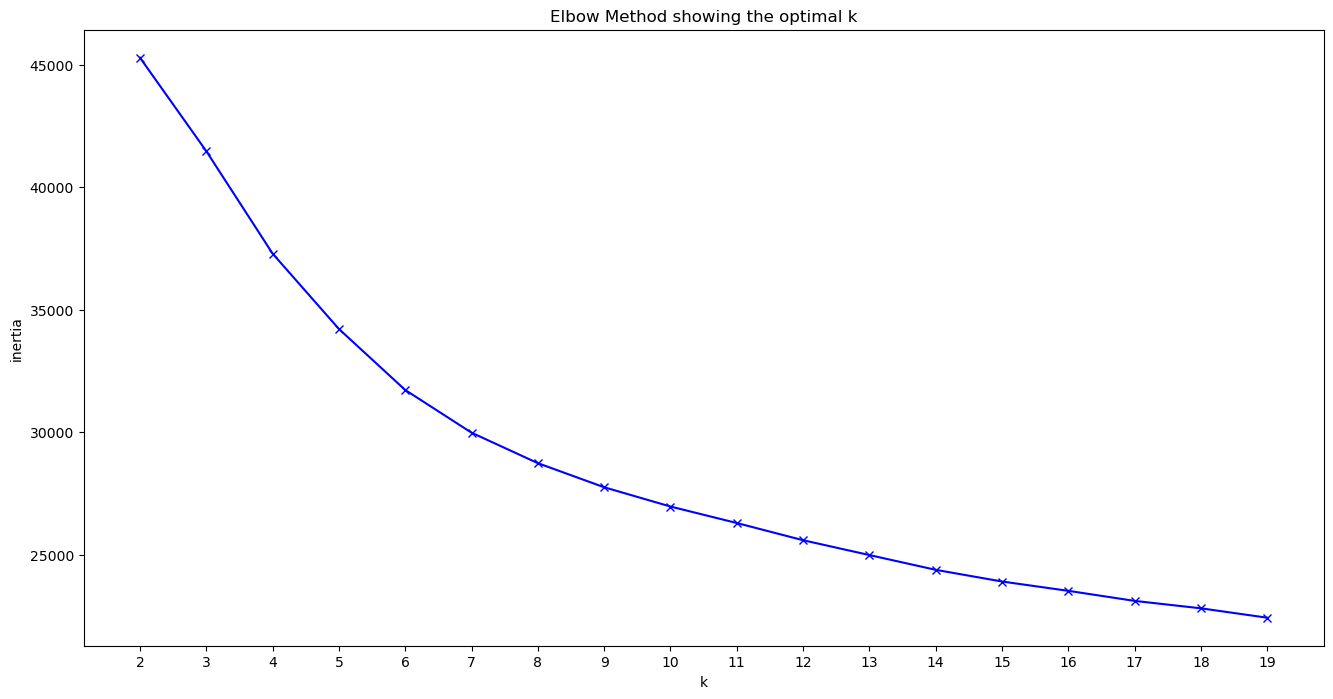

In [55]:
# Choosing the optimal number of clusters 'k'

import numpy as np
from sklearn.cluster import KMeans

K = range(2, 20)
inertia = []

for k in K:
    kmeans = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans.fit(X_prep)
    inertia.append(kmeans.inertia_)

import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16,8))
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Elbow Method showing the optimal k')

Text(0.5, 1.0, 'Slhouette score showing the optimal k')

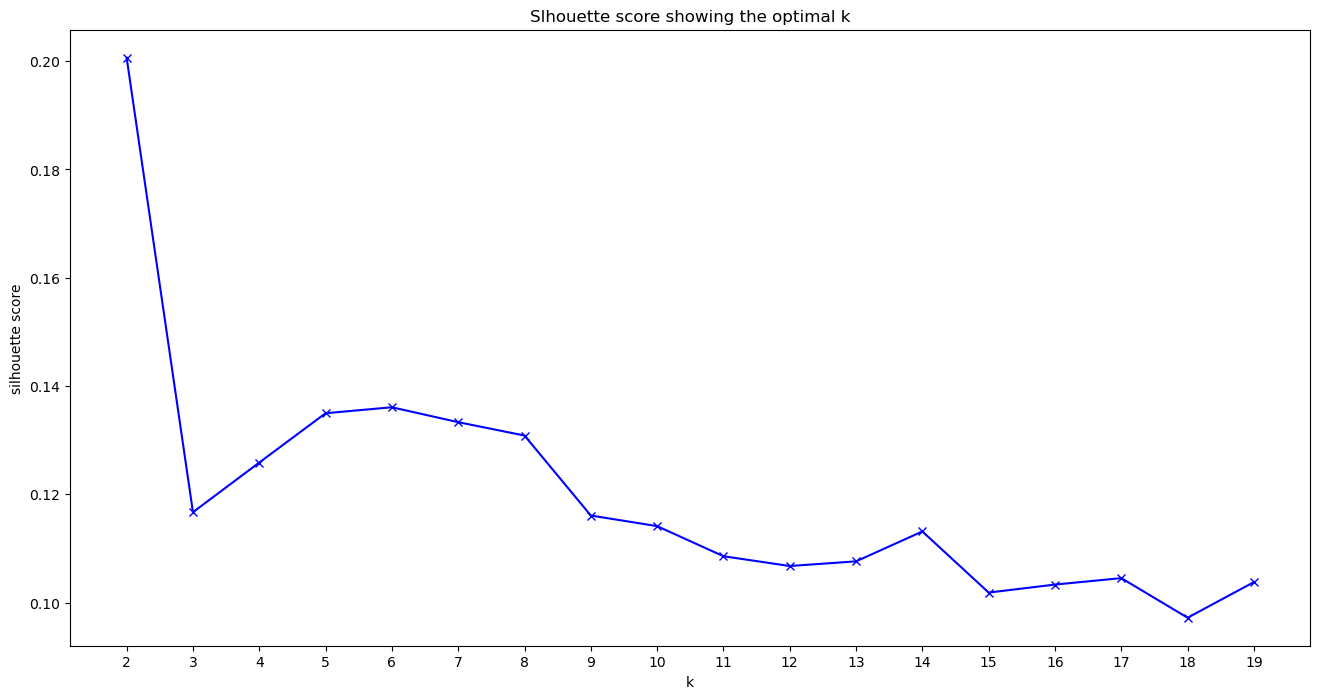

In [56]:
from sklearn.metrics import silhouette_score
K = range(2, 20)
silhouette = []

for k in K:
    kmeans = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans.fit(X_prep)
    silhouette.append(silhouette_score(X_prep, kmeans.predict(X_prep)))


plt.figure(figsize=(16,8))
plt.plot(K, silhouette, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette score')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Slhouette score showing the optimal k')

In [ ]:
# According to Slhouette score the optimal k is 2. But to songs playlist 2 clusters are not enough
# therfore I will choose 8 clusters.

# Applying Kmeans model

In [57]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=8, random_state=1234)
kmeans.fit(X_prep)

KMeans(random_state=1234)

In [58]:
# Predicting / assigning the clusters:
clusters = kmeans.predict(X_prep)

# Check the size of the clusters
pd.Series(clusters).value_counts().sort_index()

0     450
1     146
2     644
3     913
4    1408
5     848
6     543
7     337
dtype: int64

In [59]:
clusters

array([3, 6, 2, ..., 0, 2, 2], dtype=int32)

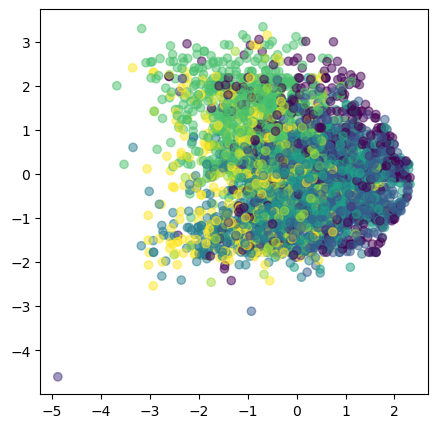

In [62]:
plt.figure(figsize=(5, 5))
plt.scatter(X_prep[:, 0], X_prep[:, 8], c=clusters,alpha=0.5)
plt.show()

In [63]:
kmeans.inertia_

28730.540076965313

In [64]:
# Create a new column 'cluster' and add it to the dataframe

num_df1 = num_df.assign(clusters = clusters)
num_df1

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,clusters
0,0.566,0.664,-5.303,0.0464,0.63400,0.000000,0.116,0.437,128.945,241688,3
1,0.768,0.820,-4.630,0.0474,0.17900,0.000000,0.689,0.625,129.965,213293,6
2,0.558,0.559,-9.222,0.0959,0.37100,0.000007,0.109,0.620,78.558,180387,2
3,0.679,0.715,-6.383,0.0407,0.07550,0.000000,0.271,0.571,127.435,214148,4
4,0.778,0.824,-5.892,0.0707,0.28400,0.000000,0.405,0.758,100.024,218093,6
...,...,...,...,...,...,...,...,...,...,...,...
5290,0.609,0.679,-4.545,0.0312,0.24300,0.000000,0.199,0.487,122.034,215960,3
5291,0.439,0.610,-7.236,0.1160,0.59300,0.000011,0.341,0.172,181.088,215508,7
5292,0.897,0.371,-5.019,0.3680,0.09040,0.000000,0.325,0.441,81.008,156005,0
5293,0.964,0.398,-8.981,0.0795,0.00151,0.000039,0.101,0.563,105.012,178405,2


In [65]:
# Concatnate the dataframes 'cat_df' and 'num_df1' 

data_clean = pd.concat([cat_df, num_df1], axis=1)

In [66]:
data_clean

,song,artist,uri,id,track_href,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,clusters
0,Take Me To Church,Hozier,spotify:track:7dS5EaCoMnN7DzlpT6aRn2,7dS5EaCoMnN7DzlpT6aRn2,https://api.spotify.com/v1/tracks/7dS5EaCoMnN7...,0.566,0.664,-5.303,0.0464,0.63400,0.000000,0.116,0.437,128.945,241688,3
1,Cooler Than Me - Single Mix,Mike Posner,spotify:track:2V4bv1fNWfTcyRJKmej6Sj,2V4bv1fNWfTcyRJKmej6Sj,https://api.spotify.com/v1/tracks/2V4bv1fNWfTc...,0.768,0.820,-4.630,0.0474,0.17900,0.000000,0.689,0.625,129.965,213293,6
2,See You Again (feat. Kali Uchis),"Tyler, The Creator",spotify:track:7KA4W4McWYRpgf0fWsJZWB,7KA4W4McWYRpgf0fWsJZWB,https://api.spotify.com/v1/tracks/7KA4W4McWYRp...,0.558,0.559,-9.222,0.0959,0.37100,0.000007,0.109,0.620,78.558,180387,2
3,Pompeii,Bastille,spotify:track:3gbBpTdY8lnQwqxNCcf795,3gbBpTdY8lnQwqxNCcf795,https://api.spotify.com/v1/tracks/3gbBpTdY8lnQ...,0.679,0.715,-6.383,0.0407,0.07550,0.000000,0.271,0.571,127.435,214148,4
4,Hips Don't Lie (feat. Wyclef Jean),Shakira,spotify:track:3ZFTkvIE7kyPt6Nu3PEa7V,3ZFTkvIE7kyPt6Nu3PEa7V,https://api.spotify.com/v1/tracks/3ZFTkvIE7kyP...,0.778,0.824,-5.892,0.0707,0.28400,0.000000,0.405,0.758,100.024,218093,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5290,Hermit the Frog,MARINA,spotify:track:4Zcz6saEkOII3PlXd9gN3o,4Zcz6saEkOII3PlXd9gN3o,https://api.spotify.com/v1/tracks/4Zcz6saEkOII...,0.609,0.679,-4.545,0.0312,0.24300,0.000000,0.199,0.487,122.034,215960,3
5291,deja vu,Olivia Rodrigo,spotify:track:61KpQadow081I2AsbeLcsb,61KpQadow081I2AsbeLcsb,https://api.spotify.com/v1/tracks/61KpQadow081...,0.439,0.610,-7.236,0.1160,0.59300,0.000011,0.341,0.172,181.088,215508,7
5292,WHOLE LOTTA MONEY,BIA,spotify:track:5yorXJWdBan1Vlh116ZtQ7,5yorXJWdBan1Vlh116ZtQ7,https://api.spotify.com/v1/tracks/5yorXJWdBan1...,0.897,0.371,-5.019,0.3680,0.09040,0.000000,0.325,0.441,81.008,156005,0
5293,Slumber Party (feat. Princess Nokia),Ashnikko,spotify:track:11ZulcYY4lowvcQm4oe3VJ,11ZulcYY4lowvcQm4oe3VJ,https://api.spotify.com/v1/tracks/11ZulcYY4low...,0.964,0.398,-8.981,0.0795,0.00151,0.000039,0.101,0.563,105.012,178405,2


In [68]:
data_clean.isna().sum()

song                0
artist              0
uri                 0
id                  0
track_href          0
danceability        0
energy              0
loudness            0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
duration_ms         0
clusters            0
dtype: int64

# Save the clean dataframe to csv

In [69]:
data_clean.to_csv('data_clean.csv', index=False)

In [71]:
data_clean = pd.read_csv('data_clean.csv')

In [72]:
data_clean

,song,artist,uri,id,track_href,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,clusters
0,Take Me To Church,Hozier,spotify:track:7dS5EaCoMnN7DzlpT6aRn2,7dS5EaCoMnN7DzlpT6aRn2,https://api.spotify.com/v1/tracks/7dS5EaCoMnN7...,0.566,0.664,-5.303,0.0464,0.63400,0.000000,0.116,0.437,128.945,241688,3
1,Cooler Than Me - Single Mix,Mike Posner,spotify:track:2V4bv1fNWfTcyRJKmej6Sj,2V4bv1fNWfTcyRJKmej6Sj,https://api.spotify.com/v1/tracks/2V4bv1fNWfTc...,0.768,0.820,-4.630,0.0474,0.17900,0.000000,0.689,0.625,129.965,213293,6
2,See You Again (feat. Kali Uchis),"Tyler, The Creator",spotify:track:7KA4W4McWYRpgf0fWsJZWB,7KA4W4McWYRpgf0fWsJZWB,https://api.spotify.com/v1/tracks/7KA4W4McWYRp...,0.558,0.559,-9.222,0.0959,0.37100,0.000007,0.109,0.620,78.558,180387,2
3,Pompeii,Bastille,spotify:track:3gbBpTdY8lnQwqxNCcf795,3gbBpTdY8lnQwqxNCcf795,https://api.spotify.com/v1/tracks/3gbBpTdY8lnQ...,0.679,0.715,-6.383,0.0407,0.07550,0.000000,0.271,0.571,127.435,214148,4
4,Hips Don't Lie (feat. Wyclef Jean),Shakira,spotify:track:3ZFTkvIE7kyPt6Nu3PEa7V,3ZFTkvIE7kyPt6Nu3PEa7V,https://api.spotify.com/v1/tracks/3ZFTkvIE7kyP...,0.778,0.824,-5.892,0.0707,0.28400,0.000000,0.405,0.758,100.024,218093,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5284,Hermit the Frog,MARINA,spotify:track:4Zcz6saEkOII3PlXd9gN3o,4Zcz6saEkOII3PlXd9gN3o,https://api.spotify.com/v1/tracks/4Zcz6saEkOII...,0.609,0.679,-4.545,0.0312,0.24300,0.000000,0.199,0.487,122.034,215960,3
5285,deja vu,Olivia Rodrigo,spotify:track:61KpQadow081I2AsbeLcsb,61KpQadow081I2AsbeLcsb,https://api.spotify.com/v1/tracks/61KpQadow081...,0.439,0.610,-7.236,0.1160,0.59300,0.000011,0.341,0.172,181.088,215508,7
5286,WHOLE LOTTA MONEY,BIA,spotify:track:5yorXJWdBan1Vlh116ZtQ7,5yorXJWdBan1Vlh116ZtQ7,https://api.spotify.com/v1/tracks/5yorXJWdBan1...,0.897,0.371,-5.019,0.3680,0.09040,0.000000,0.325,0.441,81.008,156005,0
5287,Slumber Party (feat. Princess Nokia),Ashnikko,spotify:track:11ZulcYY4lowvcQm4oe3VJ,11ZulcYY4lowvcQm4oe3VJ,https://api.spotify.com/v1/tracks/11ZulcYY4low...,0.964,0.398,-8.981,0.0795,0.00151,0.000039,0.101,0.563,105.012,178405,2
